# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


# 📊 Product Sales Analysis Report

**Author**:Tchinde Eric

**Date**: June 2025  
**Project**: Sales Strategy Evaluation  
**Company**: Pens and Printers

---

## 📝 Executive Summary

This analysis evaluates three sales methods—**Email**, **Call**, and **Email + Call**—used during the launch of a new stationery product line. 
Our objective was to determine which strategy maximizes revenue while considering the effort required.


## Overview of ou data

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data set 
df = pd.read_csv('product_sales.csv')

# Initial overview
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [97]:
# Display basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [98]:
# Begin data validation by checking unique values and value ranges
validation_summary = {}

# Check unique sales methods
validation_summary['sales_method_values'] = df['sales_method'].value_counts()

# Check week range
validation_summary['week_range'] = (df['week'].min(), df['week'].max())

# Check for missing revenue values
validation_summary['missing_revenue_count'] = df['revenue'].isnull().sum()

# Check revenue summary stats and any unusual outliers
validation_summary['revenue_stats'] = df['revenue'].describe()

# Check for duplicate customer IDs
validation_summary['duplicate_customer_ids'] = df['customer_id'].duplicated().sum()

# Check nb_sold distribution
validation_summary['nb_sold_stats'] = df['nb_sold'].describe()

# Check years_as_customer distribution
validation_summary['years_as_customer_stats'] = df['years_as_customer'].describe()

# Check nb_site_visits distribution
validation_summary['nb_site_visits_stats'] = df['nb_site_visits'].describe()

# Check unique states
validation_summary['unique_states_count'] = df['state'].nunique()

validation_summary 

{'sales_method_values': Email           7456
 Call            4962
 Email + Call    2549
 em + call         23
 email             10
 Name: sales_method, dtype: int64,
 'week_range': (1, 6),
 'missing_revenue_count': 1074,
 'revenue_stats': count    13926.000000
 mean        93.934943
 std         47.435312
 min         32.540000
 25%         52.470000
 50%         89.500000
 75%        107.327500
 max        238.320000
 Name: revenue, dtype: float64,
 'duplicate_customer_ids': 0,
 'nb_sold_stats': count    15000.000000
 mean        10.084667
 std          1.812213
 min          7.000000
 25%          9.000000
 50%         10.000000
 75%         11.000000
 max         16.000000
 Name: nb_sold, dtype: float64,
 'years_as_customer_stats': count    15000.000000
 mean         4.965933
 std          5.044952
 min          0.000000
 25%          1.000000
 50%          3.000000
 75%          7.000000
 max         63.000000
 Name: years_as_customer, dtype: float64,
 'nb_site_visits_stats': cou

## Clean data:

* Standardize sales_method values : convert 'em + call' to 'Email + Call' and 'email' to 'Email'
* Remove rows with missing value : for revenue-based analysis


In [99]:
# Clean data:

# 1. Remove rows with missing revenue for revenue-based analysis
df = df.dropna()


# 2. Standardize sales_method values
df['sales_method'] = df['sales_method'].replace({
    'em + call': 'Email + Call',
    'email': 'Email'
})



In [100]:
# Display basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


## Distribution of Years as Customer

* The majority of customers have been buying from us for between 0 and 10 years.

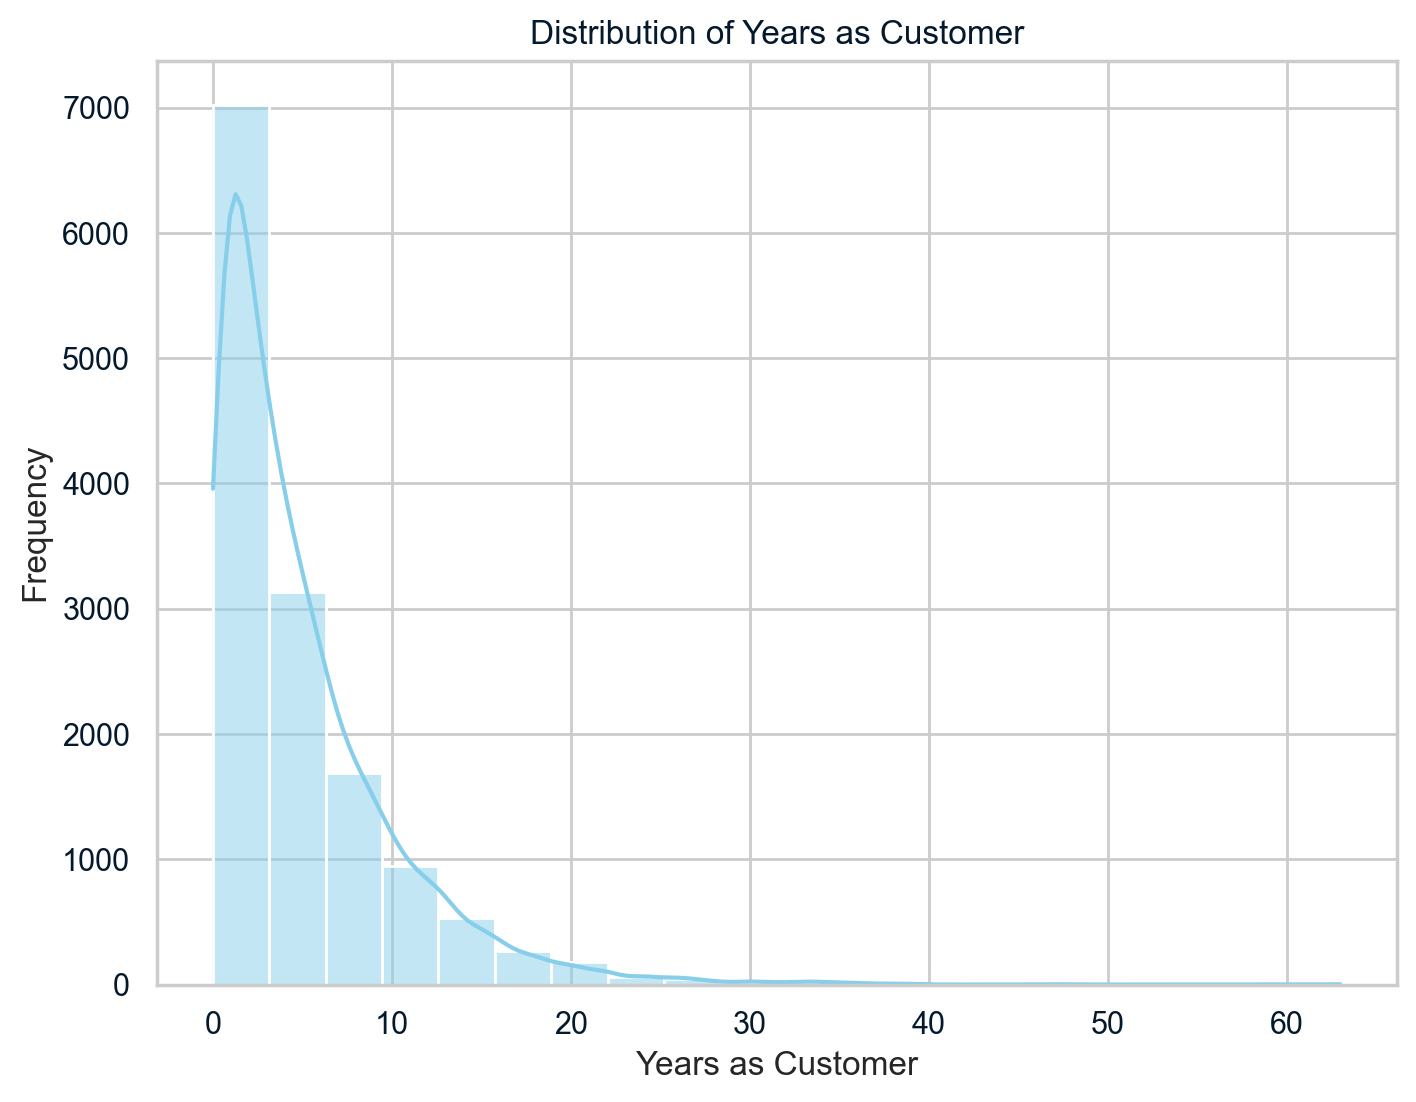

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(df['years_as_customer'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Years as Customer")
plt.xlabel("Years as Customer")
plt.ylabel("Frequency")
plt.show()


# Statistics and Distribution of Revenue


Statistics of revenue :
 count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64


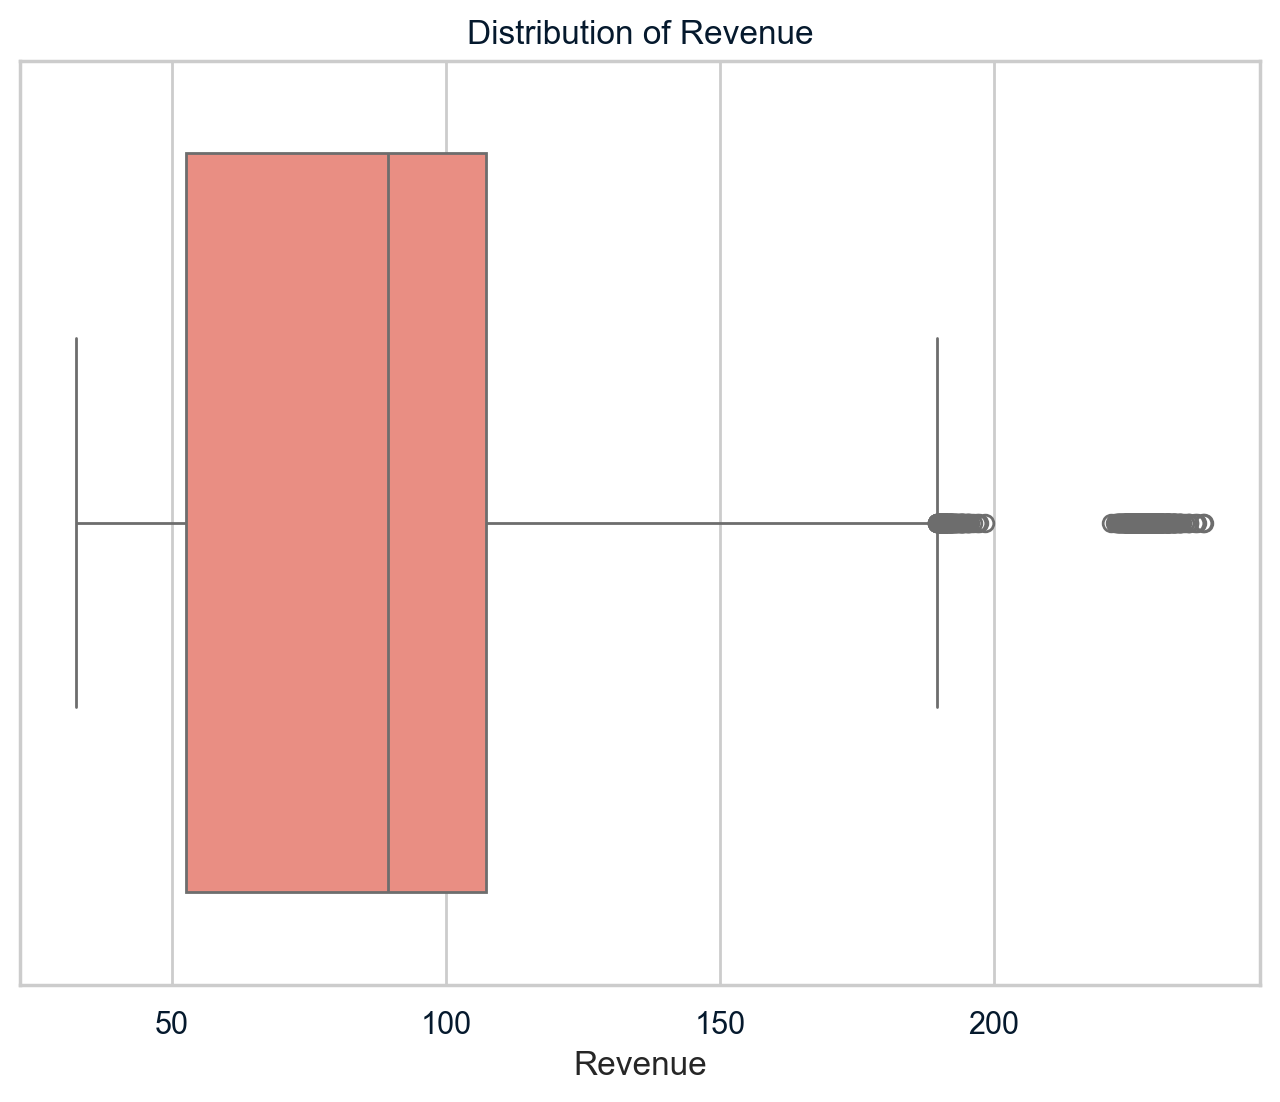

In [102]:
print("Statistics of revenue :\n", df['revenue'].describe())

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['revenue'], color="salmon")
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.show()



### 👥 Unique Customers per Sales Method

> 📌 Email is the most widely used, while Email + Call reaches fewer customers but with higher engagement.

sales_method
Call            4781
Email           6922
Email + Call    2223
Name: customer_id, dtype: int64


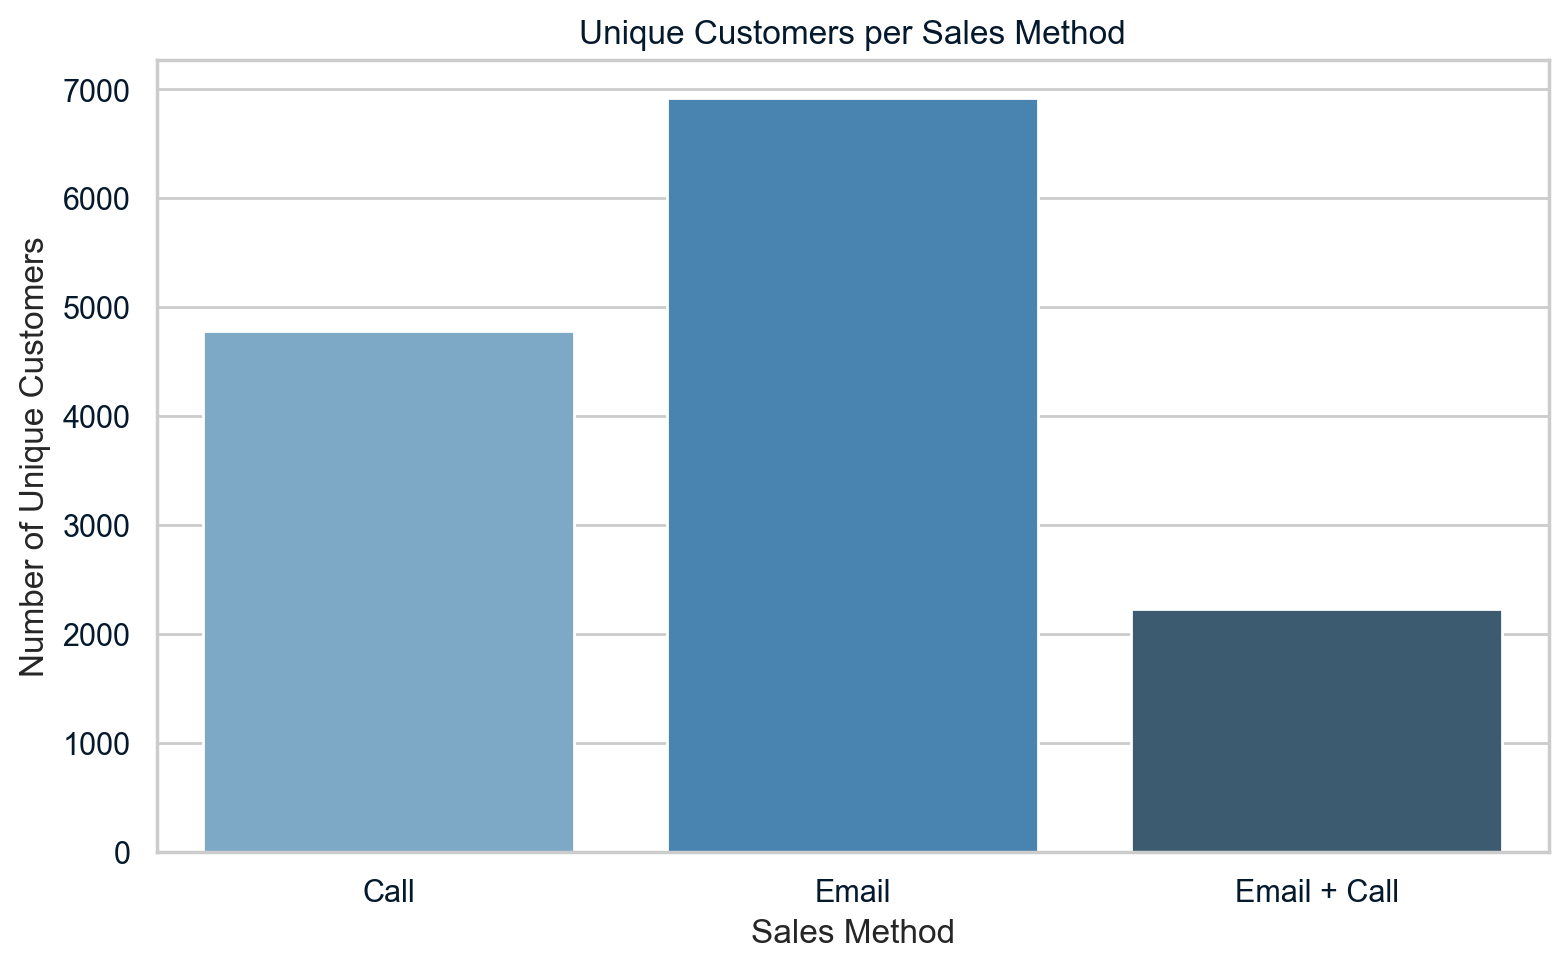

In [103]:
# Proceeding to analysis — customer count by sales method and revenue stats
customer_counts = df.groupby('sales_method')['customer_id'].nunique()
print(customer_counts)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_counts.index, y=customer_counts.values,palette="Blues_d")
plt.title("Unique Customers per Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of Unique Customers")
plt.tight_layout()


### 💰 Revenue Statistics by Sales Method

> ✅ Email + Call delivers the **highest revenue** per customer.


In [104]:
# Proceeding to analysis —  revenue stats by sales method
revenue_by_method = df.groupby('sales_method')['revenue'].describe()
revenue_by_method

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4781.0,47.597467,8.609899,32.54,41.470,49.07,52.68,71.36
Email,6922.0,97.127684,11.210469,78.83,87.880,95.58,105.17,148.97
Email + Call,2223.0,183.651233,29.083924,122.11,155.775,184.74,191.11,238.32


### 📦 Revenue Distribution (Boxplot Summary)

- **Email + Call** has the highest median and widest range (high upside).
- **Email** shows consistent performance.
- **Call** shows low and tightly clustered revenue.


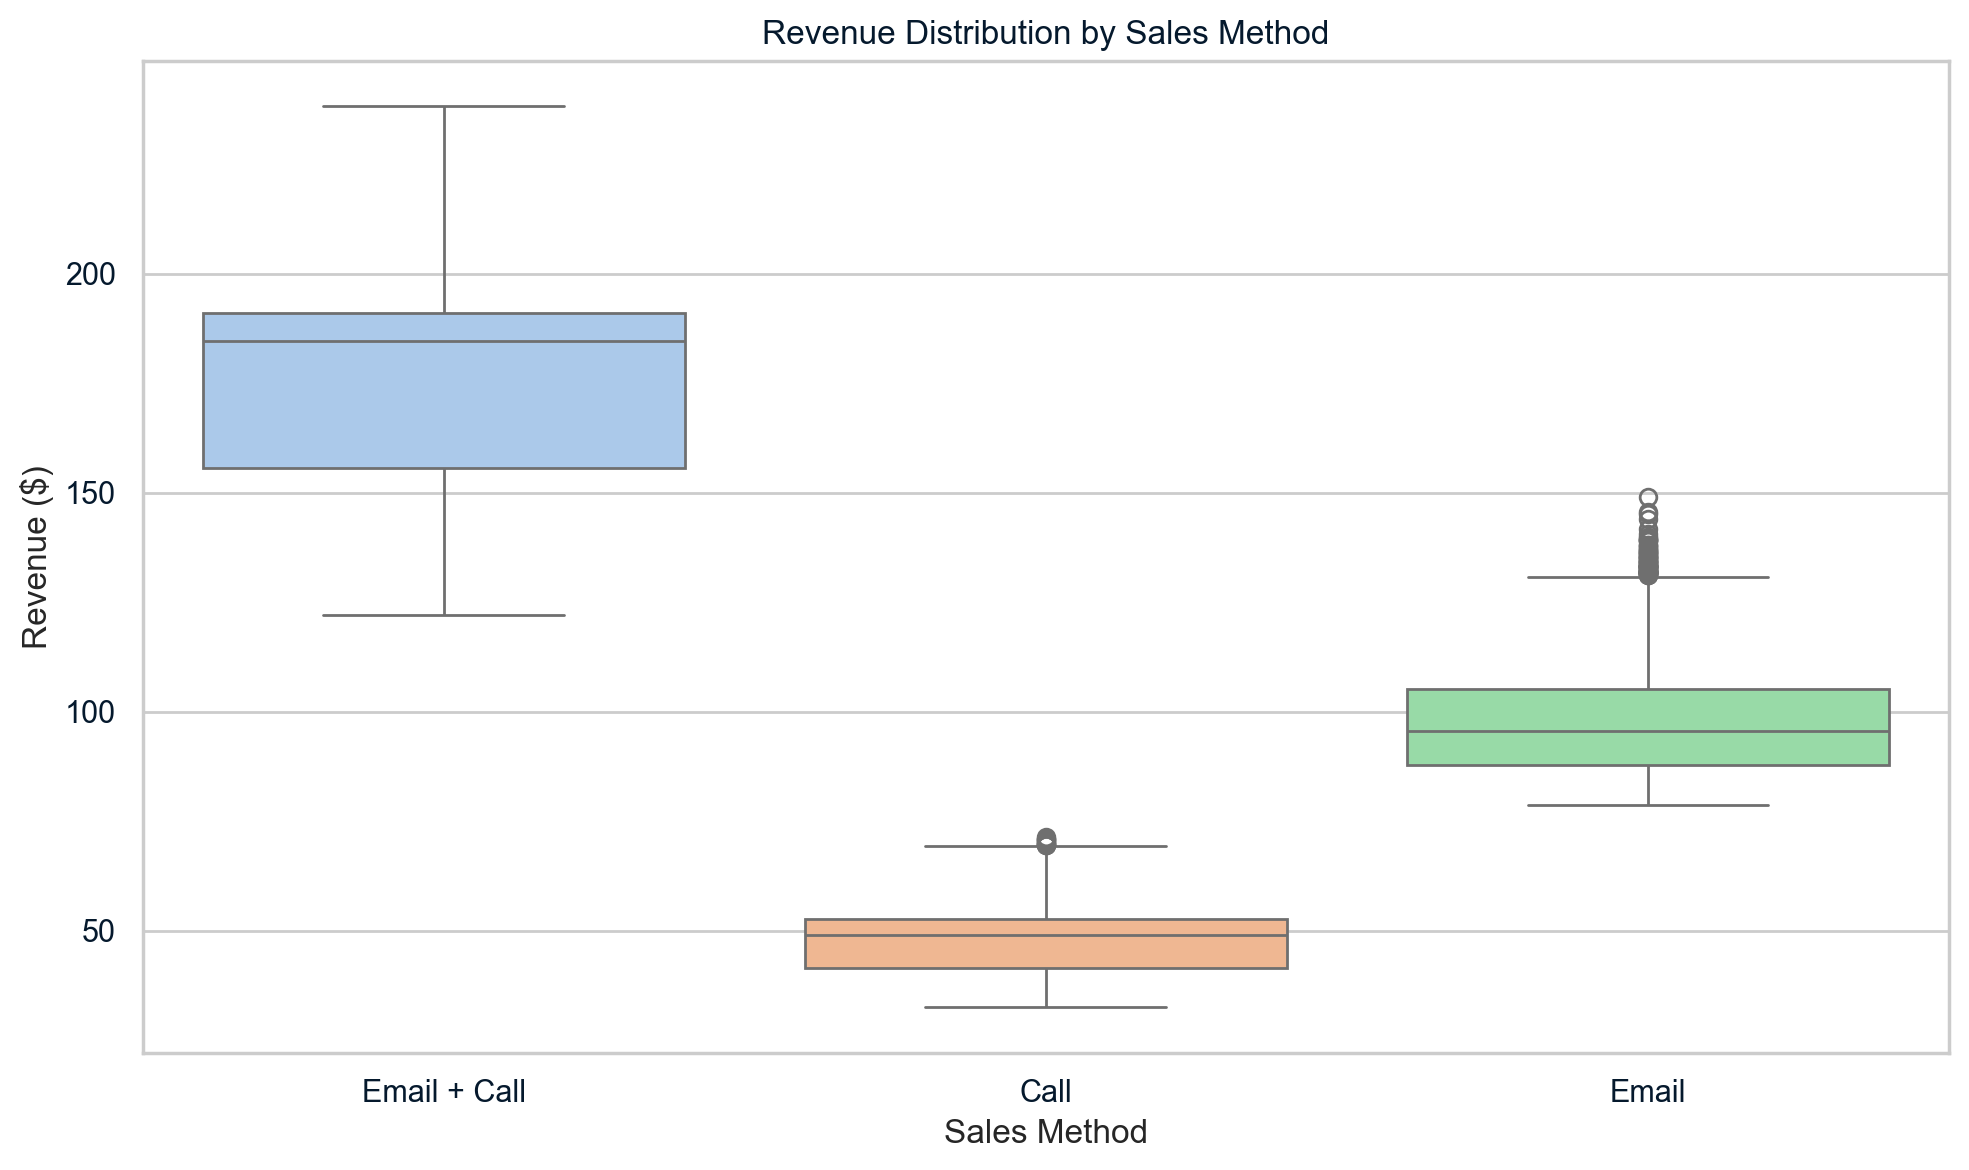

In [105]:
# 1. Boxplot: Revenue distribution by Sales Method
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sales_method', y='revenue', palette="pastel")
plt.title("Revenue Distribution by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

### Revenue Over Time by Sales Methods

- Email + Call  increase the revenue over the time.

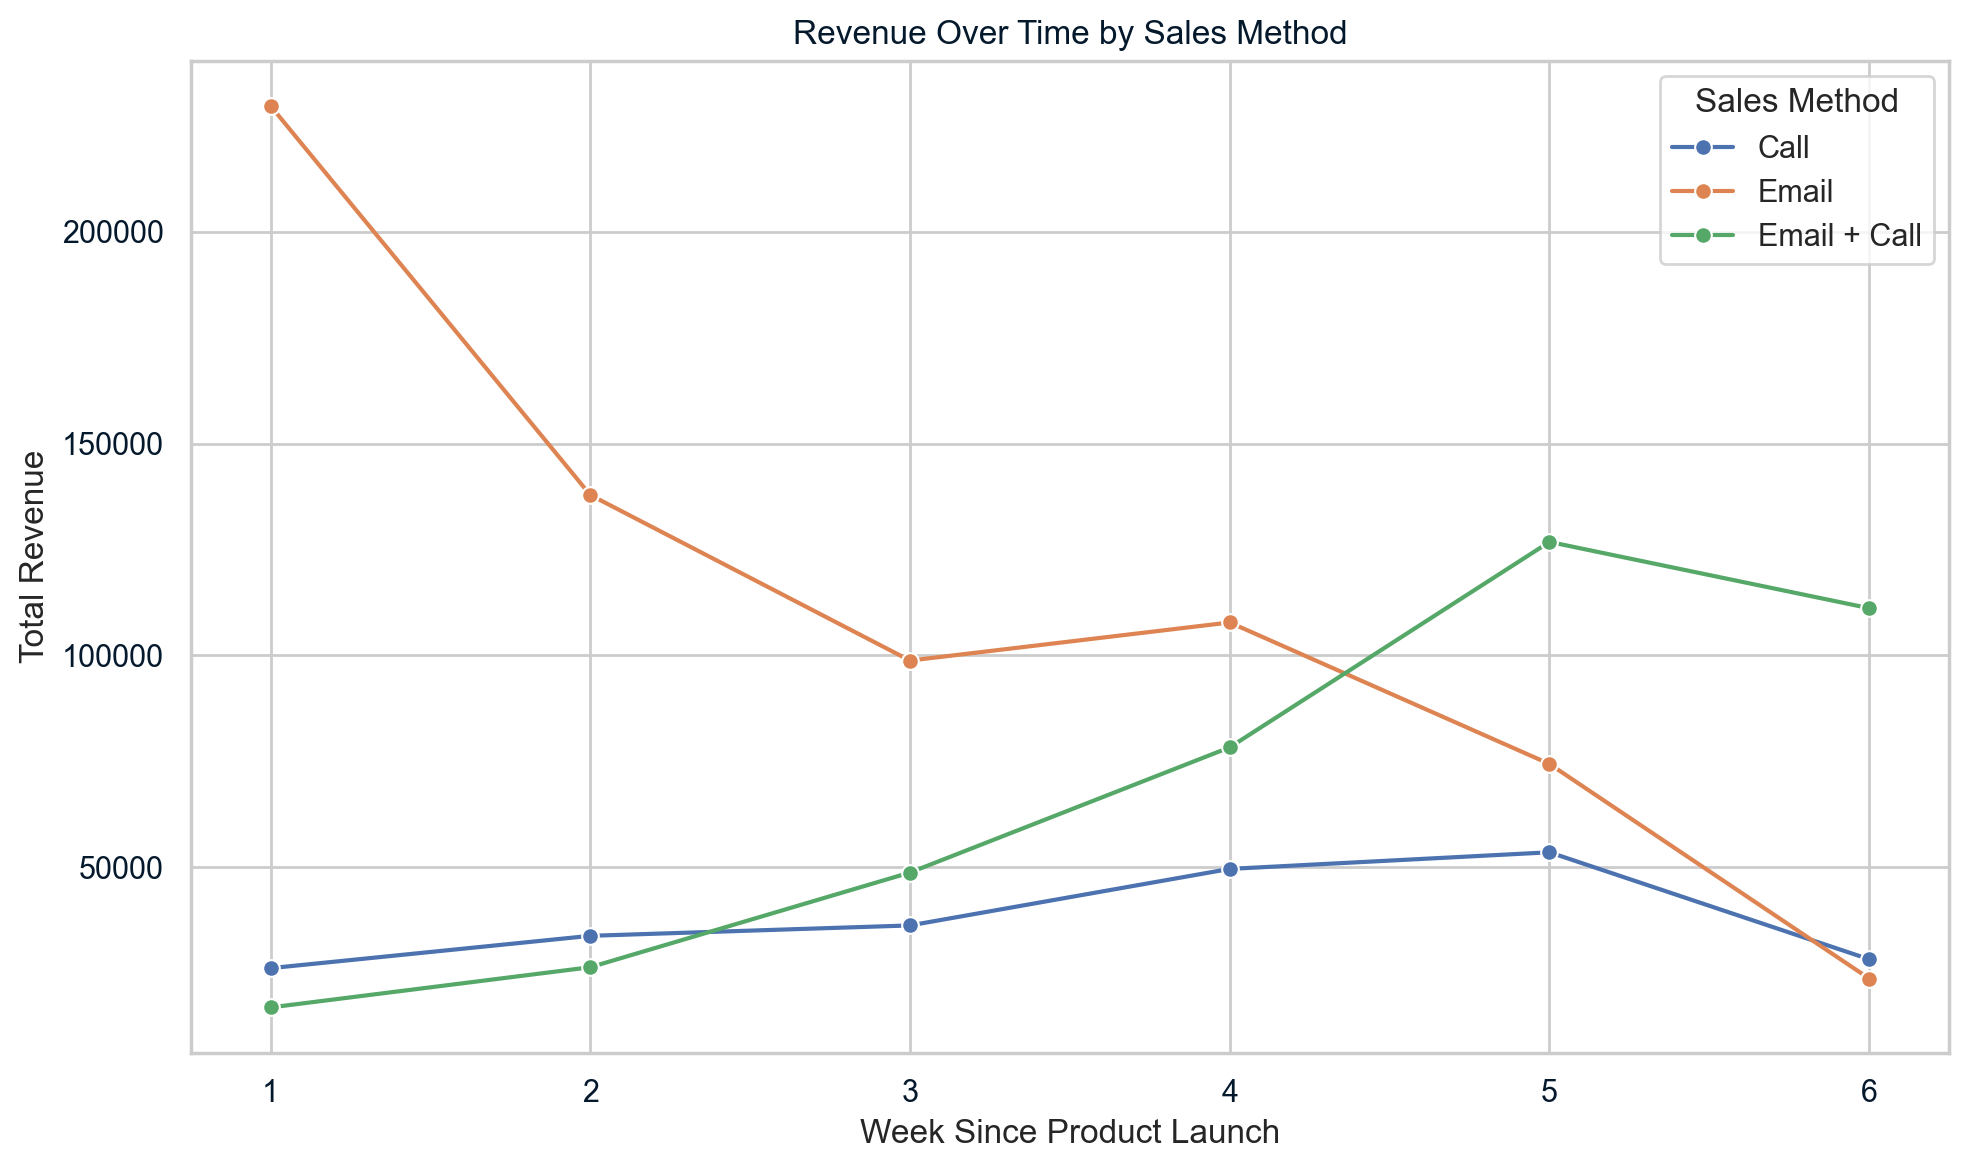

In [106]:
# Group by week and sales method to calculate total revenue
revenue_time = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_time, x='week', y='revenue', hue='sales_method', marker='o')

# Customize plot
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Week Since Product Launch')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method')
plt.tight_layout()

# Show plot
plt.show()

### 🔗 Correlation Analysis

> 📌 Revenue is most strongly tied to the number of products sold.


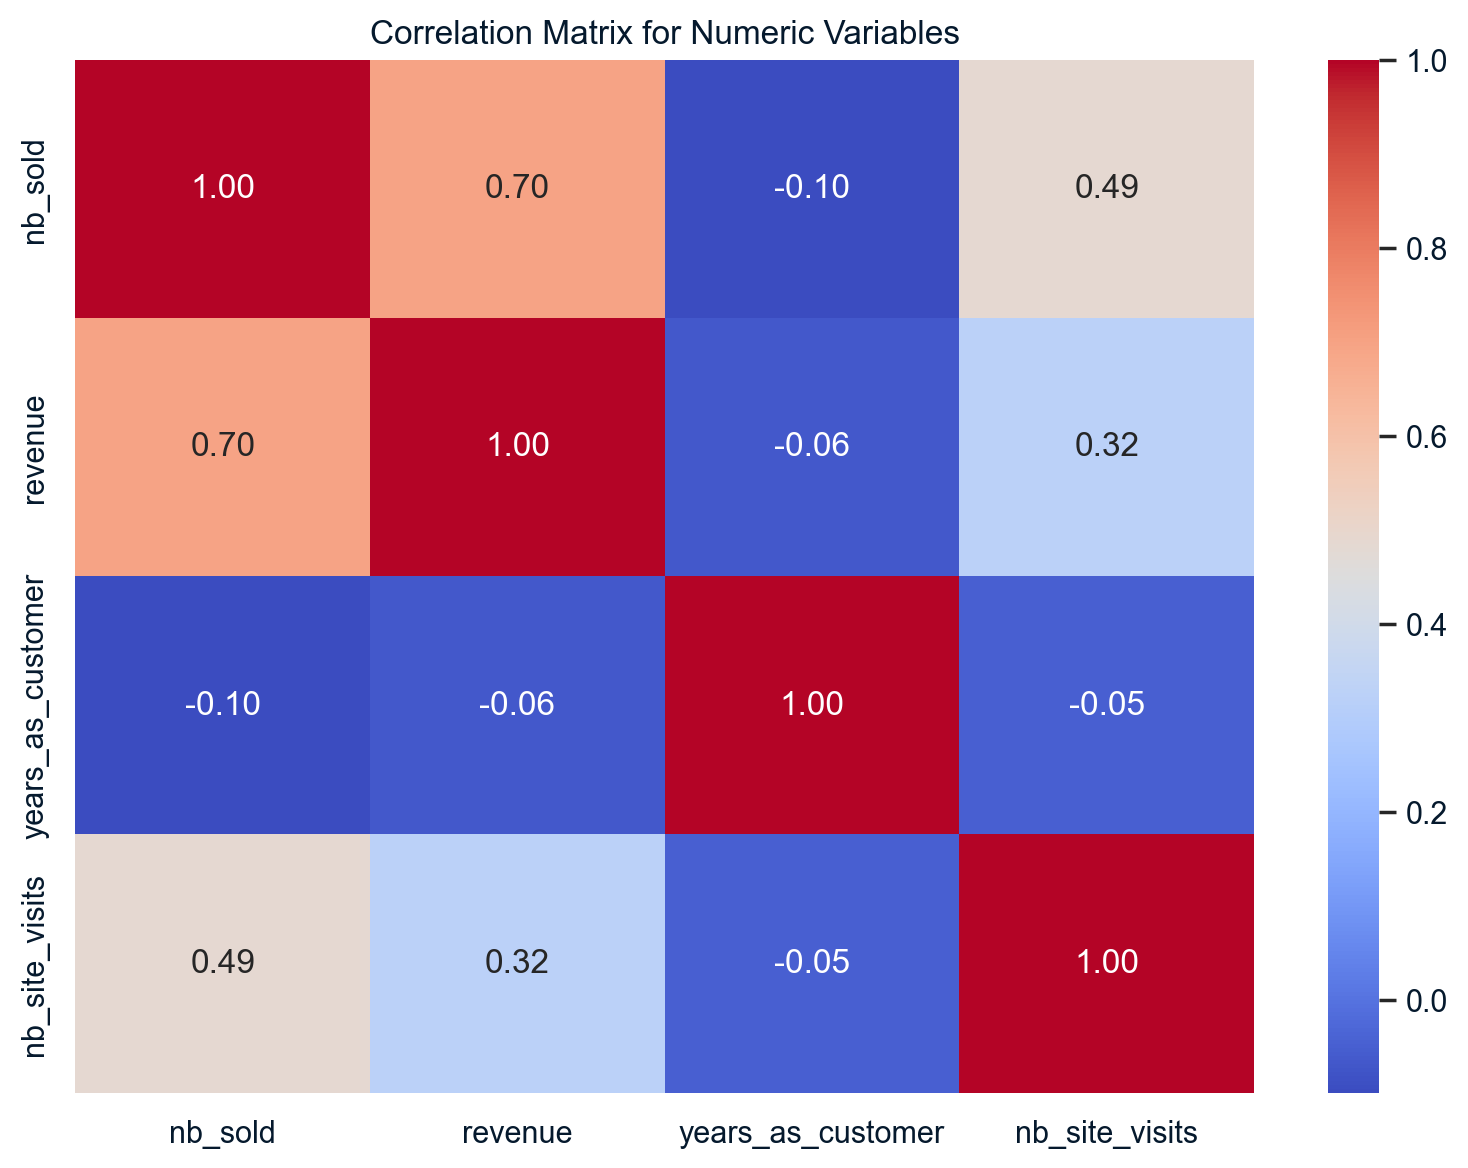

In [107]:
# 3. Heatmap: Correlation matrix for numeric columns
numeric_cols = ['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numeric Variables")
plt.tight_layout()
plt.show()

## 📏 3. Business Metric Definition

### 🎯 Key Metric: **Average Revenue per Customer**

| Sales Method     | Average Revenue |
|------------------|------------------|
| Email + Call     | **$183.65**      |
| Email            | $97.13           |
| Call             | $47.60           |

> This metric should be tracked **weekly** by sales method to evaluate marketing performance.

---

   sales_method     revenue
0          Call   47.597467
1         Email   97.127684
2  Email + Call  183.651233


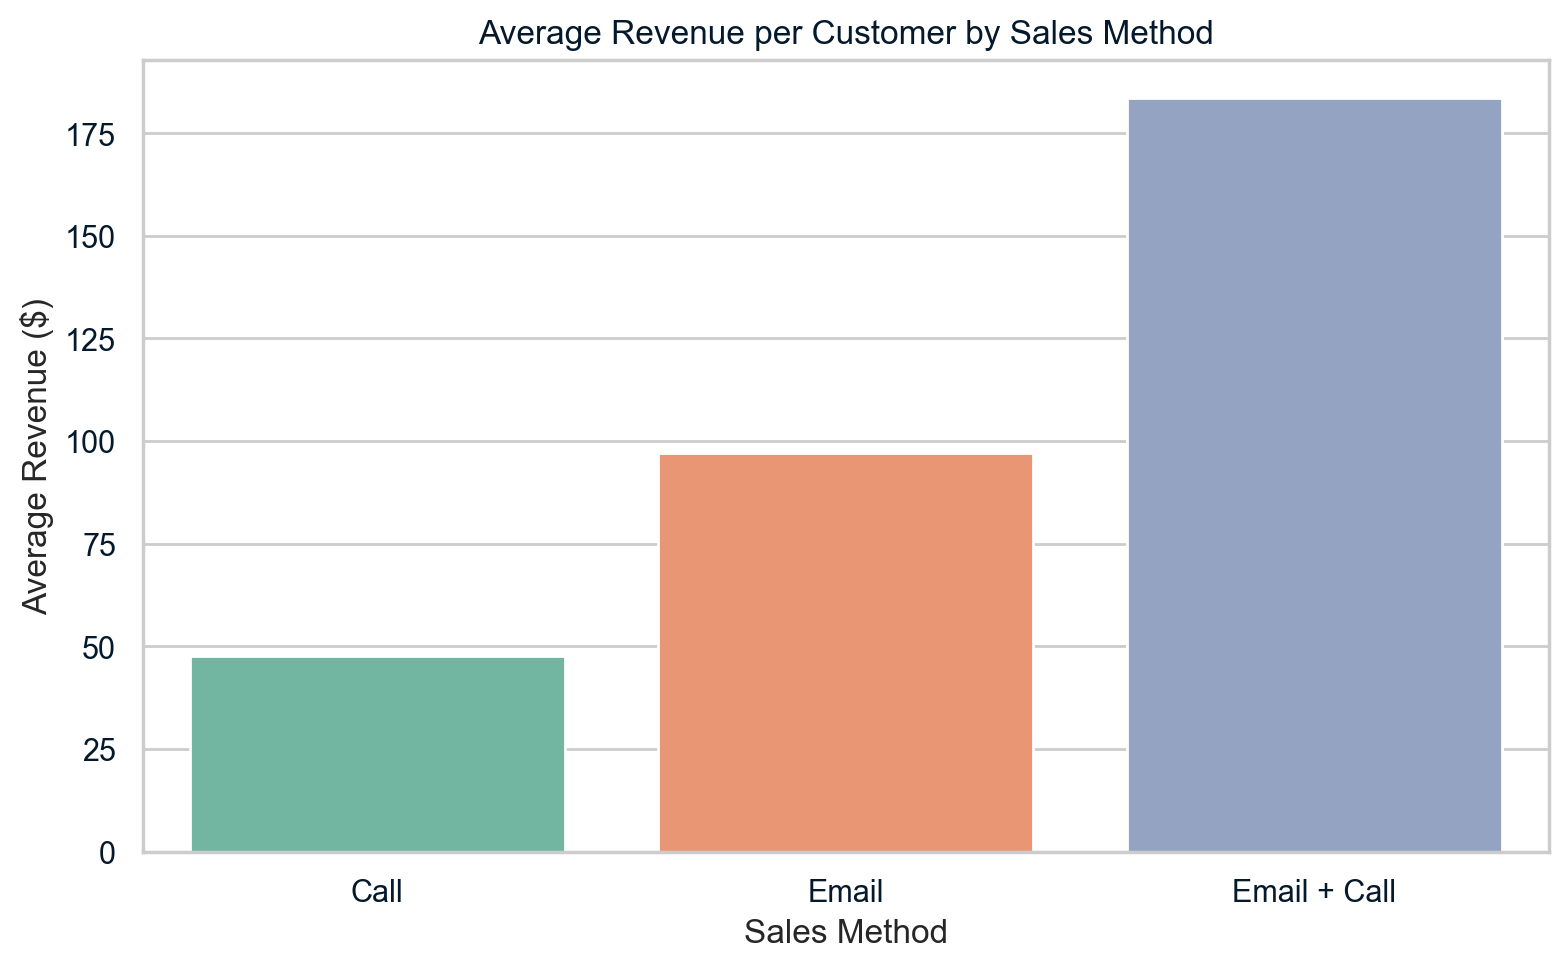

In [108]:
# Group data and calculate mean revenue per sales method
avg_revenue_by_method = df.groupby("sales_method")["revenue"].mean().reset_index()

print(avg_revenue_by_method)

# Plotting average revenue as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_revenue_by_method, x="sales_method", y="revenue", palette="Set2")
plt.title("Average Revenue per Customer by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Average Revenue ($)")
plt.tight_layout()
plt.show()


## ✅ 4.  Final Summary & Recommendations

### 🔍 Key Findings

  - Email + Call approach increase the revenue over the time.
  - Revenue is not correlate of the loyalty of customer .
    
### 📊 Key Metric
- **Metric**: Average Revenue per Customer (by sales method)
- **Why**: Reflects both effectiveness and efficiency without needing time data
- **Current Values**:
  - Email + Call: **$183.65**
  - Email: **$97.13**
  - Call: **$47.60**
    
### 💡 Recommendations
1. **Prioritize "Email + Call"** for high-potential clients.
2. **Use "Email-only"** for broader outreach at scale.
3. **Reassess or minimize "Call-only"** usage due to low return on effort.
4. **Track revenue per customer weekly.**
